In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#common libraries needed for data processing 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#libraries needed for exporting file as CSV
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import base64
import pandas as pd
from IPython.display import HTML

In [ ]:
#connect with dataset >> to colab
data = pd.read_csv('/content/drive/MyDrive/Angham Research ML/weather_data_1.2.csv')

In [ ]:
#show the data
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
0,1/1/1979,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0
1,2/1/1979,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0
2,3/1/1979,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0
3,4/1/1979,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0
4,5/1/1979,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0


In [ ]:
data['Rain_Today'].value_counts()

0    11095
1     1892
Name: Rain_Today, dtype: int64

In [ ]:
data['Rain_Tomorrw'].value_counts()

0    11095
1     1892
Name: Rain_Tomorrw, dtype: int64

In [ ]:
#the below py code id to exclude Coloms [ Lat, Long , Elevation ], as they are not corroalted
Data_eda = data.loc[:, ~data.columns.isin(['Date','Longitude', 'Latitude','Elevation','Rain_Today','Rain_Tomorrw'])]
Data_eda.head()

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,18.669,9.996,0.000000,2.122197,0.678293,12.328876
1,20.666,11.138,0.000000,3.021780,0.489818,12.470288
2,23.203,13.161,0.000000,4.171770,0.388241,12.481140
3,15.420,11.750,0.436020,7.827861,0.624069,4.772364
4,12.721,10.596,0.264358,3.416941,0.657091,4.979586


In [ ]:
#py code to download CSV file
def create_download_link( Data_eda, title = "Download CSV file", filename = "data.csv"):
    csv = data.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

export = pd.DataFrame(Data_eda)
create_download_link(export)

In [ ]:
# Let see % of null values in our Dataset
data.isnull().mean()

Date                 0.0
Longitude            0.0
Latitude             0.0
Elevation            0.0
Max Temperature      0.0
Min Temperature      0.0
Precipitation        0.0
Wind                 0.0
Relative Humidity    0.0
Solar                0.0
Rain_Today           0.0
Rain_Tomorrw         0.0
dtype: float64

In [ ]:
#show minimum temp value from all data points 
print("Minimum Temperature   "+str(data['Min Temperature'].min()))

Minimum Temperature   3.7889999999999997


In [ ]:
#show maximum temp value from all data points 
print("Maximum Temperature   "+str(data['Max Temperature'].max()))

Maximum Temperature   41.57899999999999


In [ ]:
#the below py code id to exclude Coloms [ Lat, Long , Elevation ], as they are not corroalted
Data_eda_2 = data.loc[:, ~data.columns.isin(['Rain_Today','Rain_Tomorrw'])]
Data_eda_2.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876
1,2/1/1979,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288
2,3/1/1979,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140
3,4/1/1979,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364
4,5/1/1979,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586


**Methode 1 : Univariate Visualization**  >>>>

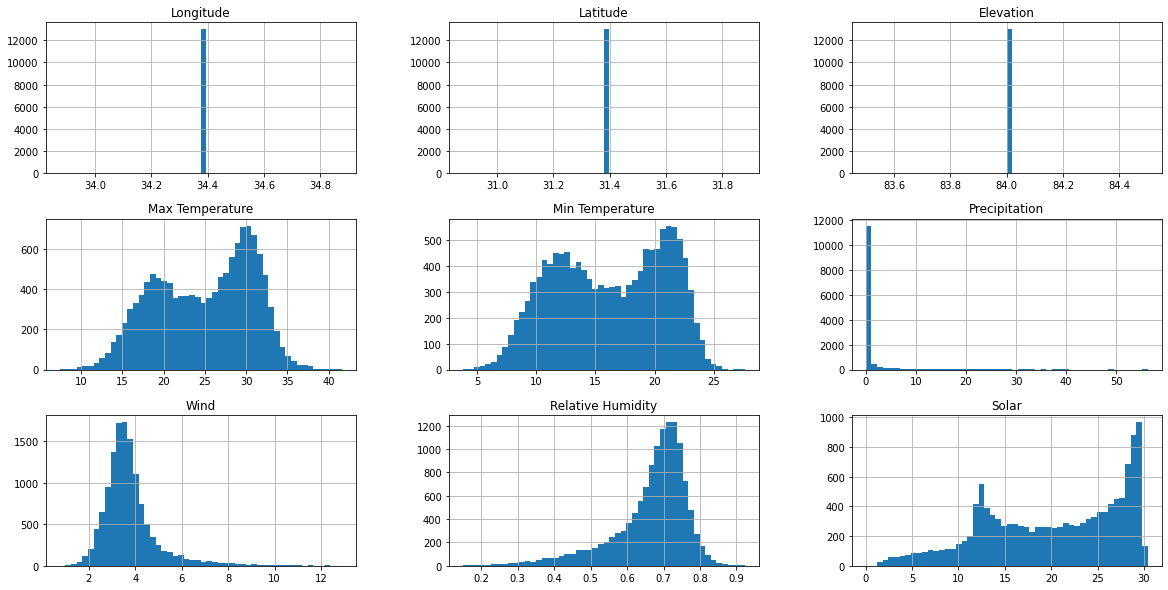

In [ ]:
#Univariate Visualization which provides summary statistics for each field in the raw dataset.  
Data_eda_2.hist(bins=50, figsize=(20, 10))
plt.show()

**Methode 2 : Pair-wise Correlation Matrix**  >>>>

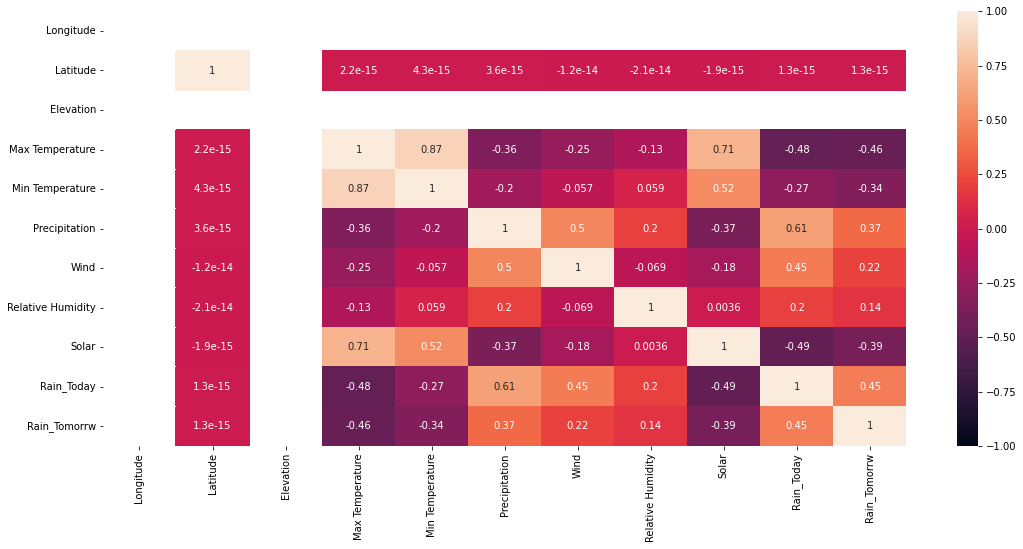

In [ ]:
#Pair-wise Correlation Matrix which is performed to understand interactions between different fields in the dataset.
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
#the below py code id to exclude Coloms [ Lat, Long , Elevation ], as they are not corroalted
pair_corr = data.loc[:, ~data.columns.isin(['Date','Longitude', 'Latitude','Elevation','Rain_Today','Rain_Tomorrw'])]
pair_corr.head()

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,18.669,9.996,0.000000,2.122197,0.678293,12.328876
1,20.666,11.138,0.000000,3.021780,0.489818,12.470288
2,23.203,13.161,0.000000,4.171770,0.388241,12.481140
3,15.420,11.750,0.436020,7.827861,0.624069,4.772364
4,12.721,10.596,0.264358,3.416941,0.657091,4.979586


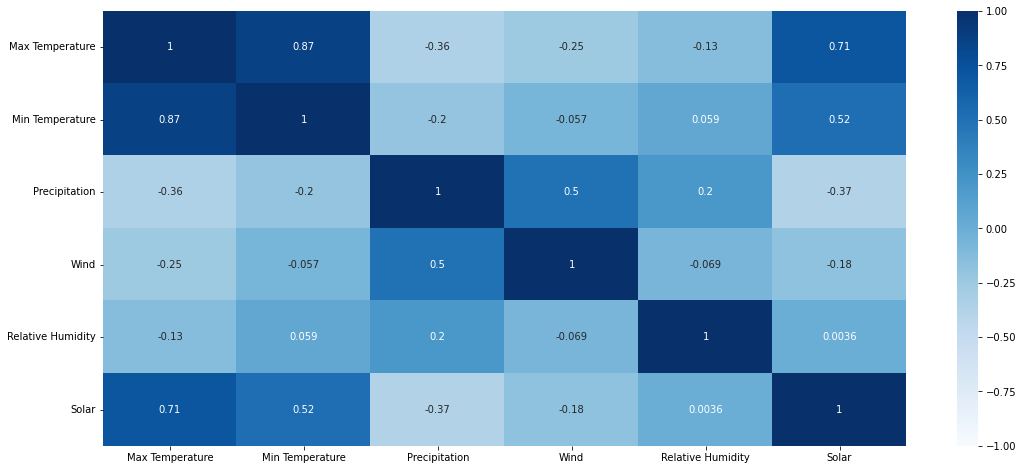

In [ ]:
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(pair_corr.corr(), vmin=-1, vmax=1, annot=True ,cmap = "Blues" )

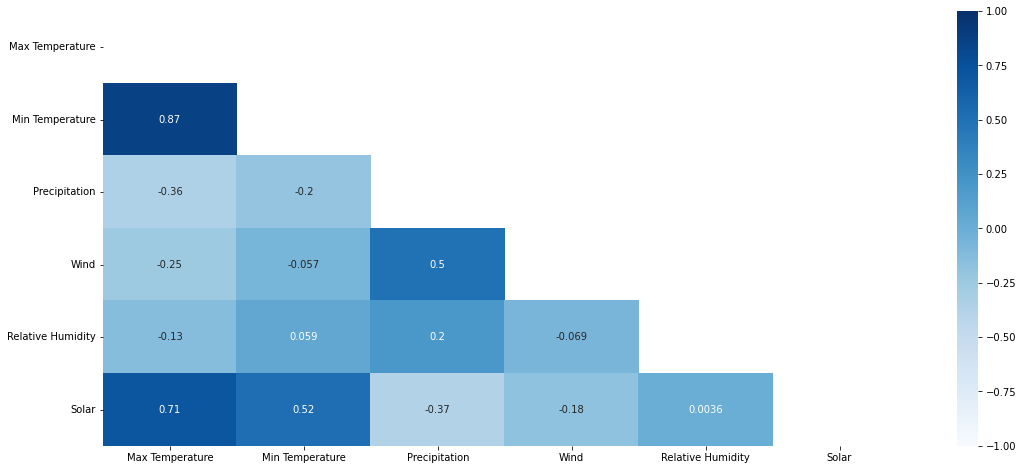

In [ ]:
#create a mask to remove the un needed upper part of the martix 
mask = np.triu(np.ones_like(pair_corr, dtype=bool)[:6])  #6 is the number of colums/features 
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(pair_corr.corr(),mask=mask, vmin=-1, vmax=1, annot=True , cmap = "Blues")

**Methode 3 : PCA for Data Visualization**  >>>>

In [ ]:
#the below py code id to exclude Coloms [ Lat, Long , Elevation ], as they are not corroalted
pca_data = data.loc[:, ~data.columns.isin(['Date','Rain_Today','Rain_Tomorrw'])]
pca_data.head()

,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876
1,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288
2,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140
3,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364
4,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586


In [ ]:
#PCA Libs 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from datetime import datetime, timezone


In [ ]:
features = ['Longitude', 'Latitude', 'Elevation', 'Max Temperature','Min Temperature','Precipitation','Wind','Relative Humidity','Solar']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Rain_Tomorrw']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['P1', 'P2','P3'])
finalDf = pd.concat([principalDf, data[['Rain_Tomorrw']]], axis = 1)
finalDf.head()

,P1,P2,P3,Rain_Tomorrw
0,1.341856,-1.855653,-0.686630,0
1,1.100445,-1.667697,1.271216,0
2,0.824560,-1.054061,2.557869,0
3,3.185849,0.926078,1.588656,0
4,2.634263,-1.472283,-0.157599,0


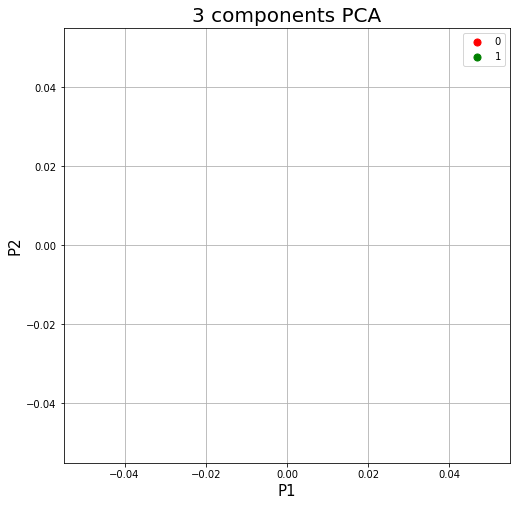

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('P1', fontsize = 15)
ax.set_ylabel('P2', fontsize = 15)
ax.set_title('3 components PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rain_Tomorrw'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'P1']
               , finalDf.loc[indicesToKeep, 'P2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<Figure size 480x480 with 0 Axes>

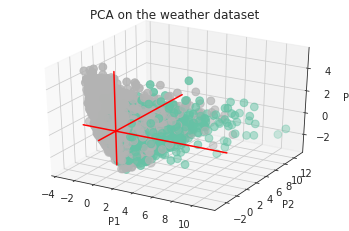

In [ ]:

sns.set_style("white")
# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
finalDf['Rain_Tomorrw']=pd.Categorical(finalDf['Rain_Tomorrw'])
my_color = finalDf['Rain_Tomorrw'].cat.codes
 
#Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['P1'], principalDf['P2'], principalDf['P3'], c=my_color, cmap="Set2_r", s=60)


# make simple, bare axis lines through space:
xAxisLine = ((min(principalDf['P1']), max(principalDf['P1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(principalDf['P2']), max(principalDf['P2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(principalDf['P2']), max(principalDf['P3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


# label the axes
ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("P3")
ax.set_title("PCA on the weather dataset")
plt.show()


**PCA plot shows clusters of samples based on their similarity**

**The explained variance** tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 45.09% of the variance and the second principal component contains 21.19 % of the variance. Together, the two components contain 66.28% of the information.

In [ ]:
pca.explained_variance_ratio_

array([0.45095994, 0.21191864, 0.17597668])

End of first section - EDA


---



In [ ]:
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
0,1/1/1979,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0
1,2/1/1979,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0
2,3/1/1979,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0
3,4/1/1979,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0
4,5/1/1979,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0


In [ ]:
data['Date'] = data['Date'].apply(pd.to_datetime, format='%d/%m/%Y')
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
1970-01-01 00:00:00.000000000,1979-01-01,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0
1970-01-01 00:00:00.000000001,1979-01-02,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0
1970-01-01 00:00:00.000000002,1979-01-03,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0
1970-01-01 00:00:00.000000003,1979-01-04,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0
1970-01-01 00:00:00.000000004,1979-01-05,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0


In [ ]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [ ]:
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw,day,month,year
1970-01-01 00:00:00.000000000,1979-01-01,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0,1,1,1979
1970-01-01 00:00:00.000000001,1979-01-02,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0,2,1,1979
1970-01-01 00:00:00.000000002,1979-01-03,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0,3,1,1979
1970-01-01 00:00:00.000000003,1979-01-04,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0,4,1,1979
1970-01-01 00:00:00.000000004,1979-01-05,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0,5,1,1979


In [ ]:
del group_1

In [ ]:
del group_2

In [ ]:
group_1 = data.groupby(by=["year", "month"]).size().reset_index(name="counts") 
#df_agg_had = df.groupby(by=["Device_Manufacturer", "Device_PrimaryHardwareType"]).size().reset_index(name="counts") 
print(group_1)

     year  month  counts
0    1979      1      31
1    1979      2      28
2    1979      3      31
3    1979      4      30
4    1979      5      31
..    ...    ...     ...
422  2014      3      31
423  2014      4      30
424  2014      5      31
425  2014      6      30
426  2014      7      31

[427 rows x 3 columns]


In [ ]:
group_2 = data.groupby(by=["year"]).size().reset_index(name="counts") 
print(group_2)

    year  counts
0   1979     365
1   1980     366
2   1981     365
3   1982     365
4   1983     365
5   1984     366
6   1985     365
7   1986     356
8   1987     365
9   1988     366
10  1989     365
11  1990     365
12  1991     365
13  1992     366
14  1993     365
15  1994     365
16  1995     365
17  1996     366
18  1997     365
19  1998     365
20  1999     365
21  2000     366
22  2001     365
23  2002     365
24  2003     365
25  2004     366
26  2005     365
27  2006     365
28  2007     365
29  2008     366
30  2009     365
31  2010     365
32  2011     365
33  2012     366
34  2013     365
35  2014     212


In [ ]:
group_1 = data.groupby(by=["Precipitation"]).size().reset_index(name="counts") 
print(group_1)

      Precipitation  counts
0          0.000000    8472
1          0.000858       2
2          0.001717      51
3          0.003433     104
4          0.005150       2
...             ...     ...
3078      37.751771       1
3079      38.306243       1
3080      40.439981       1
3081      49.206735       1
3082      56.278386       1

[3083 rows x 2 columns]


In [ ]:
group_4 = data.groupby(by=["year"]).mean()
print(group_4)

      Longitude  Latitude  Elevation  ...  Rain_Tomorrw        day     month
year                                  ...                                   
1979     34.375    31.379       84.0  ...      0.126027  15.720548  6.526027
1980     34.375    31.379       84.0  ...      0.166667  15.756831  6.513661
1981     34.375    31.379       84.0  ...      0.167123  15.720548  6.526027
1982     34.375    31.379       84.0  ...      0.186301  15.720548  6.526027
1983     34.375    31.379       84.0  ...      0.186301  15.720548  6.526027
1984     34.375    31.379       84.0  ...      0.122951  15.756831  6.513661
1985     34.375    31.379       84.0  ...      0.136986  15.720548  6.526027
1986     34.375    31.379       84.0  ...      0.157303  15.412921  6.407303
1987     34.375    31.379       84.0  ...      0.169863  15.720548  6.526027
1988     34.375    31.379       84.0  ...      0.196721  15.756831  6.513661
1989     34.375    31.379       84.0  ...      0.186301  15.720548  6.526027

In [ ]:
group_5 = pd.DataFrame(group_4)

In [ ]:
group_5.head()

,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw,day,month
year,,,,,,,,,,,,,
1979,34.375,31.379,84.0,25.253619,16.168145,0.632881,3.786048,0.664920,20.199134,0.126027,0.126027,15.720548,6.526027
1980,34.375,31.379,84.0,24.559189,15.610322,0.925583,3.723140,0.678660,19.664754,0.166667,0.166667,15.756831,6.513661
1981,34.375,31.379,84.0,24.479137,15.754981,0.478719,3.755327,0.677333,19.872631,0.167123,0.167123,15.720548,6.526027
1982,34.375,31.379,84.0,24.025323,15.525274,0.849754,3.631497,0.677582,19.522033,0.189041,0.186301,15.720548,6.526027
1983,34.375,31.379,84.0,23.711655,15.346614,0.852868,3.759003,0.692046,19.524026,0.183562,0.186301,15.720548,6.526027


In [ ]:
#dfff = data.loc[:, ~data.columns.isin(['Longitude','Date','month','day','Relative Humidity','Wind','Max Temperature','Solar', 'Min Temperature','Latitude','Elevation','Rain_Today','Rain_Tomorrw'])]

In [ ]:
#dfff.head()

,Precipitation,year
1970-01-01 00:00:00.000000000,0.000000,1979
1970-01-01 00:00:00.000000001,0.000000,1979
1970-01-01 00:00:00.000000002,0.000000,1979
1970-01-01 00:00:00.000000003,0.436020,1979
1970-01-01 00:00:00.000000004,0.264358,1979


In [ ]:
#group_3 = dfff.groupby(['year']).sum()
#print(group_3)

      Precipitation
year               
1979     231.001721
1980     338.763416
1981     174.732390
1982     310.160351
1983     311.296790
1984     177.495305
1985     229.253809
1986     293.613056
1987     220.497329
1988     381.408422
1989     294.765749
1990     269.379196
1991     511.749258
1992     390.436939
1993     252.420328
1994     438.016346
1995     191.362096
1996     225.033510
1997     278.381545
1998     178.923472
1999     122.865795
2000     333.765475
2001     252.629767
2002     267.826089
2003     243.204702
2004     224.469551
2005     154.240339
2006     161.459534
2007     165.639517
2008     164.303562
2009     159.244278
2010     187.203635
2011     171.700862
2012     211.709990
2013     290.518036
2014      75.036630


In [ ]:
#group_2 = dfff.groupby(['year']).mean()
#print(group_2)

      Precipitation
year               
1979       0.632881
1980       0.925583
1981       0.478719
1982       0.849754
1983       0.852868
1984       0.484960
1985       0.628093
1986       0.824756
1987       0.604102
1988       1.042100
1989       0.807577
1990       0.738025
1991       1.402053
1992       1.066768
1993       0.691563
1994       1.200045
1995       0.524280
1996       0.614846
1997       0.762689
1998       0.490201
1999       0.336619
2000       0.911928
2001       0.692136
2002       0.733770
2003       0.666314
2004       0.613305
2005       0.422576
2006       0.442355
2007       0.453807
2008       0.448917
2009       0.436286
2010       0.512887
2011       0.470413
2012       0.578443
2013       0.795940
2014       0.353946


In [ ]:
#to show shape of dataframe 
#group_3.shape

(36, 1)

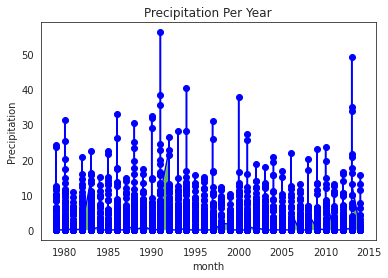

In [ ]:
import matplotlib.pyplot as plt
   

plt.plot(data['year'], data['Precipitation'], color='blue', marker='o')
plt.fill_between(data['year'], data['Precipitation'], facecolor='g', alpha=0.6)

plt.title('Precipitation Per Year')
plt.xlabel('month')
plt.ylabel('Precipitation')
plt.show()

